In [35]:
import os
import time

from dotenv import load_dotenv
import pandas as pd
# LangChain imports
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains import RetrievalQA, LLMChain
from langchain.prompts import PromptTemplate
from langchain_community.document_loaders import TextLoader
from langchain_google_genai import ChatGoogleGenerativeAI

import utils

In [36]:
caminho_arquivo = 'WhatsApp Chat - Câmara de Graduação/_chat.txt'
file = []
with open(caminho_arquivo, encoding='utf-8') as f:
    for linha in f:
        file.append(linha)

In [29]:
messages = [utils.parse_message(msg) for msg in file if utils.parse_message(msg) is not None]
df = pd.DataFrame(messages)
df.head()

,date,time,author,content,is_question
0,02/10/19,11:17:12,Câmara de Graduação,‎Messages and calls are end-to-end encrypted. ...,False
1,02/10/19,11:17:12,Patricia Guimarães Costa,‎Patricia Guimarães Costa created this group,False
2,24/02/22,14:18:21,Câmara de Graduação,‎Vera Martin (Prograd) added you,False
3,24/02/22,14:19:38,Vera Martin (Prograd),"Michele, muito obrigada por tudo. Sucesso e qu...",False
4,24/02/22,14:20:16,Michele,Obrigada!!!!,False


In [6]:
load_dotenv()

# Try to get API key from Streamlit secrets, then fallback to environment variable
gemini_api_key = os.getenv("GEMINI_KEY")
os.environ["GOOGLE_API_KEY"] = gemini_api_key

In [7]:
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.7)
prompt = PromptTemplate(
    input_variables=["contexto", "pergunta"],
    template="Contexto:\n{contexto}\n\nPergunta:\n{pergunta}\n\nResposta:"
)
chain = LLMChain(llm=llm, prompt=prompt)


C:\Users\larae\AppData\Local\Temp\ipykernel_20900\593780056.py:6: LangChainDeprecationWarning:

The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.



In [ ]:
caminho_arquivo ='_chat.txt'
with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
    conteudo = arquivo.read()

In [30]:
df['mensagem_formatada'] = df['date'] + ' ' + df['time'] + ' ' + df['author'] + ": " + df['content']

# 2. Juntar todas as mensagens em um único texto
texto = '\n'.join(df['mensagem_formatada'])

In [14]:
pergunta= "Com base no contexto fornecido, gere um resumo curto"
resposta = chain.run(contexto=texto, pergunta=pergunta)


In [31]:
import tiktoken

def contar_tokens(texto, modelo="gpt-4"):
    tokenizer = tiktoken.encoding_for_model(modelo)
    tokens = tokenizer.encode(texto)
    return len(tokens)

print("Número de tokens:", contar_tokens(texto))
print(len(texto.encode('utf-8')))

Número de tokens: 930188
2593437


In [1]:
mm = """'\n01/01/23 11:19:09 Cláudia: Feliz 2023!!!!! Que tenhamos um novo recomeço com saúde, luz em nossas vidas e realizações! ✨🍾🥂😘\n01/02/23 08:58:00 ~\u202fKatia Maria Mendes Silva: Bom dia colegas. Ontem foi meu último dia substituindo prof. Helio na coordenação. Assim estou me.retirando do grupo e agradecendo a todos(as) pelo apoio. Valeu mesmo. Desejo um semestre tranquilo e produtivo a todos.🤩🌷🌹\n01/02/23 10:07:29 Laurenio Sombra: Bom dia, gente. Fiz o contato com a SGC  sobre o problema do lançamento do Sagres nos dias 09e 10, e eles  informaram o que vou colar abaixo.\n01/02/23 11:00:04 ~\u202fTiago de Man: Pessoal, a medidas de distanciamento social ainda estão em vigor para este semestre de 2023.1?\n01/02/24 07:58:00 Ingrid Gutiérrez UEFS: Bom dia colegas\n01/02/24 08:47:53 João B. Rocha-Junior: Quando a gente vai começar a organizar a Feira de Graduação desse ano? 😬\n01/02/24 08:57:19 Ana Maria Carvalho: Os estudantes fazem o pedido pelo SEI?\n01/02/24 10:57:39 Myria Felix: Bom dia, pessoal! Já temos calendário reuniões Consepe?\n01/02/24 11:25:02 Mauricio: Bom dia. Informo que foi publicada hoje a minha nomeação  para coordenação do Colegiado de Matemática biênio 2024-2026. Sigamos juntos!\n01/03/22 06:10:22 Vera Martin (Prograd): Bom dia. Todos os recursos/repescagem via email para a PROGRAD foram analisados. A análise foi encaminhada aos colegiados.\n01/03/22 08:04:05 Hélio Ponce: Vera , bom dia. E o pessoal da repescagem ? Terão direito a recurso ?\n01/03/22 09:14:14 Vera Martin (Prograd): A repescagem foi entre 25 e 28/02. Estamos pensando em uma re-repescagem depois do ajuste do colegiado. Importante solicitar o comprovante no ajuste dos que não entregaram pessoalmentr ou enviaram eletronicamente.\n01/03/22 11:58:14 ~\u202fAlex: Colegas, me esclareçam duas dúvidas: o estudante pode trancar o curso em qualquer momento? Ele deve enviar solicitação para qual e-mail do DAA?\n01/03/22 15:06:14 Camila Leal Col Eng Civil: Pessoal existe alguma resolução para o DAs? Falando sobre criação, composição, etc ?\n01/03/22 15:56:38 João B. Rocha-Junior: Boa tarde! Vários alunos estão reportando um "erro de cálculo no escore presente no Sagres" e que pode afetar na matrícula deles. Vocês também estão recebendo esse tipo de reclamação?\n01/03/23 01:51:54 Hélio Ponce: Síntese das ações da gestão 2018-2023\n01/03/23 08:11:51 Myria Felix: Parabéns, professor @557588067312 !\n01/03/23 08:12:42 Myria Felix: Bom dia, pessoal! Como estão de saúde?\n01/03/23 10:06:49 João B. Rocha-Junior: Por aqui tudo bem... só chateado com o fechamento do sistema. Ainda temos muitos ajustes para serem feitos e o processo de pedir ao DAA deixa tudo muito mais lento 😕 Deveriam ter deixado ao menos essa última semana, porque o ano só começa depois do carnaval 😅\n01/03/23 11:54:09 Shirlei Tiara Prograd: Bom dia, colegas! O Sagres tem apresentado problemas hoje?\n01/03/23 15:20:04 Gleice Cordeiro: Prezados e Prezadas colegas, boa tarde! Ontem encerrou minha gestão no colegiado de Psicologia, o professor @557588441316 seguirá na função. Gratidão pelos encontros, aprendizados e pela potência de afeto que é esse espaço. Espero encontrá-los(as) em breve pelos corredores da nossa casa UEFS. Grande abraço!!! Um ano leve e gestões serenas para vocês...\n01/03/24 08:58:34 Ana Carla 🌻: Bom dia! Previsão de normalização?\n01/03/24 09:02:57 Fábio DAA: Aguardando retorno da Trends. Socializo a informação por aqui.\n01/03/24 09:40:45 Ana Maria Carvalho: Infelizmente não sei dizer qual o caminho.  Quando digitamos o horário peço a secretária para deixar impresso.\n01/03/24 10:32:14 Ricardo: alguém sabe dizer como identifico as disciplinas de maior índice de reprovação?\n01/03/24 11:44:32 Myria Felix: Obrigada!\n01/03/24 15:18:20 Fredson Braz: Estou com um caso no Colegiado de um aluno que quer fazer estágio não obrigatório pela prefeitura. Ele se matriculou no curso, foi reprovada em todas as disciplinas e agora quer fazer estágio\n01/03/24 16:04:01 Ricardo: estava vendo isso essa semana, no SISU2023.2 em Alimentos só 25% dos candidatos são de Feira os demais são de outros municípios, ou seja, a maioria terão que trabalhar para se manter.\n01/03/24 16:14:18 Ana Maria Carvalho: Não tenho dúvidas, tem se tornando um mecanismo de mão de obra barata e está mesmo se criando um ciclo em que o aluno não estuda e justifica porque está trabalhando no estágio e segue repetindo semestre a semestre as disciplinas. Precisa ser repensada a Resolução de Estágio.\n01/04/22 09:39:13 Myria Felix: Bom dia!!!\n01/04/22 09:54:06 Luciana Bagdeve: Imaginem que já estou há quase 6 anos no colegiado em gestões diferentes sem receber nada. Qdo nada ajudaria na gasolina\n01/04/22 17:14:56 ~\u202fRosevaldo: Boa tarde, a Uefs não vai se posicionar sobre o sequestro e tortura do nosso aluno Rafael?\n01/04/22 18:10:08 Laurenio Sombra: O CONSU estava formulando um texto.\n01/04/23 08:04:10 Germano: Bom dia ! É uma planilha gigante.  Precisa filtrar...\n01/04/25 13:59:51 🌹 Rosa Eugênia 🌹: Professores(as) e estudantes!\n01/04/25 14:53:13 Saulo Rocha: Parabéns Carla, Nada mais representativo do que fazem aniversário no Dia do Trabalho. 🤣🤣🤣🤣🤣🤣\n01/05/24 08:03:15 João B. Rocha-Junior: Me fale mais sobre essa parceria aí... tô precisando de uma parceria dessas para a próxima feirinha 😅\n01/05/25 18:56:54 Saulo Rocha: Boa noite, pró!\n01/06/22 08:01:40 Carla Borges: Bom dia! Compartilho porque realmente vale a pena!\n01/06/22 09:52:05 João B. Rocha-Junior: Bom dia! Surgiu uma dúvida aqui agora, as ATAs colocadas no SEI para a assinatura devem ficar como públicas ou sigilosas? Eu acho que pública, mas Maeli fez essa consulta e fiquem sem saber...😅\n01/06/22 10:20:13 Luciana Bagdeve: Bom dia colegas\n01/06/22 11:15:39 ~\u202fVanessa Vieira: https://www.jornalgrandebahia.com.br/2022/05/25-mil-alunos-se-formaram-pela-uefs-em-46-anos-media-anual-e-de-pouco-mais-de-500-estudantes-e-custo-e-estimado-em-r-470-mil-por-aluno/\n01/06/22 11:26:43 Adriana Queiroz - Agronomia: Em agronomia os conselheiros votaram por deixar a critério do orientador, já que não houve posicionamento oficial e já estava em cima da hora\n01/06/22 11:59:11 Luciana Bagdeve: Que absurdo\n01/06/22 20:04:13 Ana Maria Carvalho: Pessoal boa noite.  Partilhando a Abertura do Programa UPT-UEFS amanhã. Se puderem acompanhar e conhecer um pouco do Programa será muito bom.\n01/06/23 08:40:11 Cláudia: Bom dia! Vocês tem internet em seus módulos?\n01/06/23 11:44:17 Patricia Guimarães Costa: 📍 *INFORME*\n01/06/23 12:18:06 Ricardo: Olá gente, boa tarde. Algum colegiado aqui tem algum Manual de Colegiado? Um manual de transição para a coordenação do colegiado? Se puderem compartilhar ficarei muito agradecido, estou fazendo um aqui e gostaria de melhorar com a experiência de quem já tem. Desde já agradeço.\n01/06/23 14:23:37 Patricia Guimarães Costa: Memorando Circ. Nº 04/2023\n01/06/23 15:45:50 Mauricio: A gestão anterior me passou algo assim. Ajudou bastante. Vou procurar e te passo.\n01/06/23 16:56:43 Myria Felix: Pessoal! Boa tarde… Nunca está tendo transferência interna, externa para o curso de Medicina? Pessoas externas estão me perguntando.\n01/07/22 09:10:49 Vera Martin (Prograd): \u200eThis message was deleted.\n01/07/22 12:57:49 Fredson Braz: Boa tarde gente,\n01/07/22 13:37:46 Hélio Ponce: Não temos condições de digitar o horário hoje\n01/07/22 14:04:55 Adriana Queiroz - Agronomia: Mais bizarro é que os Departamentos que estão atrasados, como sempre, e os Colegiados que tem que ficar pedindo prorrogação\n01/07/22 18:14:00 Gilmar🏋🏾\u200d♀️UEFS: Nós faltamos algumas disciplinas que os departamentos não designaram docentes, então não dá pra digitar o horário. Além disso, um departamento só mandou o horário hoje. Pense!\n01/07/23 14:52:58 Vanessa: Olá, colegas! Espero que estejam bem, em paz, com saúde! Estarei de férias entre 03 e 22/07 e a professora Cléa (vice-coordenadora) ficará responsável pelos encaminhamentos do colgeo.  Escalarei o Himalaia e poderemos nos encontrar na Frequência 600Hz. Abraços para vocês!\n01/07/24 12:57:27 ~\u202fMárcia Misi: Olá colegas. A professora responsável por esta disciplina me pediu que divulgasse entre seus estudantes, especialmente para os cursos de pedagogia e as licenciaturas @557599722329 @557581492404 @557191177902 @557599729631 @557591243772 @557581284367 @557583292552 @557581512001 ....\n01/07/24 15:01:23 Ana Maria Carvalho: Acredito que seja o fia e horário para o próximo semestre\n01/07/24 15:36:51 ~\u202fMárcia Misi: é um componente da área de direito que está sendo oferecido para 2024.2 para estudantes de outros cursos. Peço que divulguem para a matrícula!\n01/07/24 16:43:33 Saulo Rocha: Discussão das ADs, preparação do 2 de julho, amanhã 07:00h na lapinha\n01/08/22 08:51:10 João B. Rocha-Junior: Bom dia! Já podemos homologar, no sistema de vacinação, os comprovantes de vacina apresentados pessoalmente?\n01/08/22 09:50:13 Myria Felix: Bom dia! Para a comprovação de vacinação está valendo a Resolução Consepe 01/2022?\n01/08/22 11:16:24 ~\u202fVanessa Vieira: Colegas, vejam a distorção da reportagem, em relação ao que a ASCOM publicou.\n01/08/22 11:26:43 Adriana Queiroz - Agronomia: Em agronomia os conselheiros votaram por deixar a critério do orientador, já que não houve posicionamento oficial e já estava em cima da hora\n01/08/22 13:08:33 Luciana Bagdeve: Então era possível mudar se fosse determinado?\n01/08/22 13:24:49 ~\u202fGilcélia Pires: Meus sentimentos para Hélio Ponce.\n01/08/22 13:28:09 ~\u202fGilcélia Pires: Prezados colegas, depois de 3 anos coordenando o Colegiado de Língua Inglesa-Coling, afirmo que aprendi muito com vocês. Obrigada pela parceria e apoio.\n01/08/22 15:21:19 Cláudia: Seja bem-vinda, Professora Karla!\n01/08/22 15:23:59 Cláudia: Colegas, onde eu consigo gerar a lista dos calouros no Sagres Acadêmico?\n01/08/22 15:25:48 Myria Felix: Gostaria de saber também como vocês estão de Reforma Curricular! Por aqui, temos muitas intercorrências…\n01/08/22 17:55:06 Fredson Braz: Encaminhei o email que enviei mais cedo para desenvolvimento @uefs.br para você. Tem todos os dados do aluno\n01/08/23 07:23:30 ~\u202fAlex: Obrigado, Ricardo!\n01/08/23 11:22:35 Fredson Braz: Bom dia.\n01/08/24 07:18:45 Myria Felix: Qual o horário?\n01/08/24 07:40:39 João B. Rocha-Junior: Bom dia. Entrei em contato com o Mostarda e eles fecharam a unidade Fraga Maia. Estão de mudança. Vocês tem outras sugestões de local? Pensei na D’Napoli Fraga Maia.\n01/08/24 11:02:33 Adriana Queiroz - Agronomia: Tu faz isso em 1 segundo, né?\n```' quais topicos foram discutidos nessas menseagens"""

In [8]:
import re
messages_list = []
pattern = re.compile(r'(\d{2}/\d{2}/\d{2})\s(\d{2}:\d{2}:\d{2})\s(.+?):\s(.+)')

for line in mm.strip().split('\n'):
    match = pattern.match(line)
    if match:
        date, time, author, message = match.groups()
        messages_list.append({
            'Data': date,
            'Hora': time,
            'Autor': author.strip(),
            'Mensagem': message.strip()
        })

# Criar DataFrame
df = pd.DataFrame(messages_list)

# Mostrar DataFrame
print(df.head())

       Data      Hora                       Autor  \
0  01/01/23  11:19:09                     Cláudia   
1  01/02/23  08:58:00  ~ Katia Maria Mendes Silva   
2  01/02/23  10:07:29             Laurenio Sombra   
3  01/02/23  11:00:04              ~ Tiago de Man   
4  01/02/24  07:58:00       Ingrid Gutiérrez UEFS   

                                            Mensagem  
0  Feliz 2023!!!!! Que tenhamos um novo recomeço ...  
1  Bom dia colegas. Ontem foi meu último dia subs...  
2  Bom dia, gente. Fiz o contato com a SGC  sobre...  
3  Pessoal, a medidas de distanciamento social ai...  
4                                    Bom dia colegas  


In [10]:
df.Autor.value_counts()

Autor
Myria Felix                    9
João B. Rocha-Junior           7
Ana Maria Carvalho             5
Cláudia                        4
Fredson Braz                   4
Adriana Queiroz - Agronomia    4
Luciana Bagdeve                4
Hélio Ponce                    3
Ricardo                        3
Vera Martin (Prograd)          3
Saulo Rocha                    3
~ Gilcélia Pires               2
~ Alex                         2
~ Vanessa Vieira               2
Laurenio Sombra                2
Mauricio                       2
~ Márcia Misi                  2
Patricia Guimarães Costa       2
Shirlei Tiara Prograd          1
Gleice Cordeiro                1
~ Tiago de Man                 1
~ Katia Maria Mendes Silva     1
Ingrid Gutiérrez UEFS          1
Camila Leal Col Eng Civil      1
Ana Carla 🌻                    1
Germano                        1
~ Rosevaldo                    1
Fábio DAA                      1
🌹 Rosa Eugênia 🌹               1
Carla Borges                   1
Vane

In [16]:
dados_tempo = [
    [1, 1, 48.77],
    [1, 2 , 1.53],
    [1,3,37.229],

    [2,1,40.678],
    [2,2,1.37],
    [2,3,53.206],

    [3,1,48.41],
    [3,2,1.73],
    [3,3,36.04],

    [4,1,51.444],
    [4,2,1.07],
    [4,3,35.81],

    [5,1,59.076],
    [5,2,0.83],
    [5,3,32.879],
    
    [6,1,42.39],
    [6,2,2.51],
    [6,3,32.57824]

]

In [17]:
df = pd.DataFrame(dados_tempo, columns=['Pergunta', 'Texto','Tempo'])
df.head()

,Pergunta,Texto,Tempo
0,1,1,48.770
1,1,2,1.530
2,1,3,37.229
3,2,1,40.678
4,2,2,1.370


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

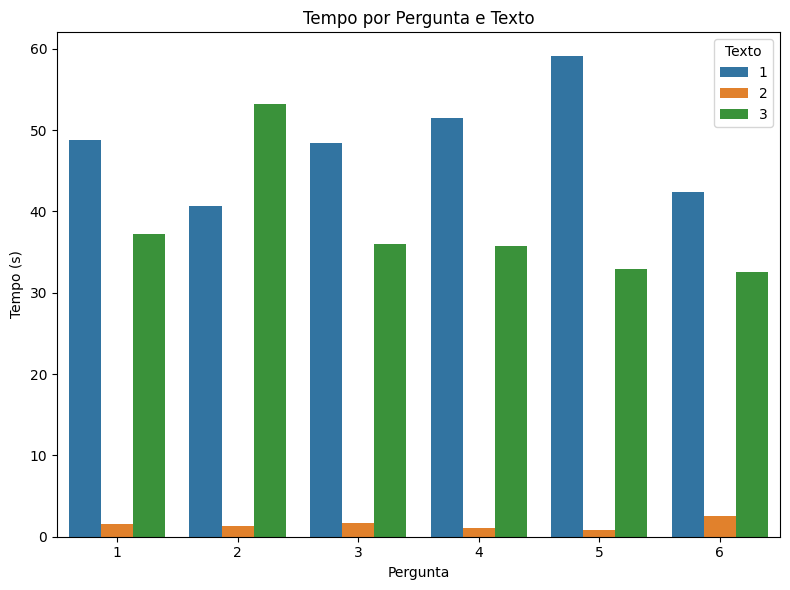

In [22]:
df['Pergunta'] = df['Pergunta'].astype(str)
df['Texto'] = df['Texto'].astype(str)

# Criação do gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Pergunta', y='Tempo', hue='Texto')

plt.title('Tempo por Pergunta e Texto')
plt.xlabel('Pergunta')
plt.ylabel('Tempo (s)')
plt.legend(title='Texto')
plt.tight_layout()
plt.show()



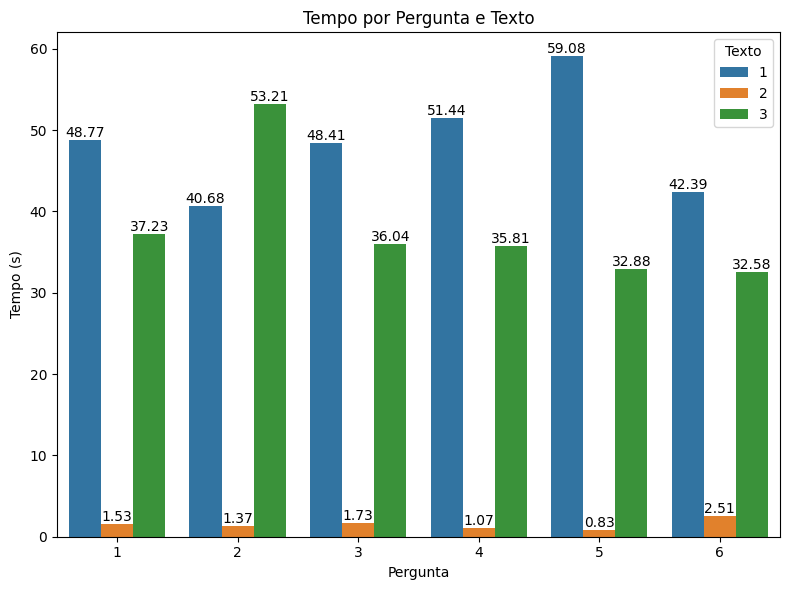

In [23]:
df['Pergunta'] = df['Pergunta'].astype(str)
df['Texto'] = df['Texto'].astype(str)

# Cria o gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Pergunta', y='Tempo', hue='Texto')

# Adiciona valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

plt.title('Tempo por Pergunta e Texto')
plt.xlabel('Pergunta')
plt.ylabel('Tempo (s)')
plt.legend(title='Texto')
plt.tight_layout()
plt.show()

In [33]:
# Lê o conteúdo do arquivo como string
with open('_chat.txt', 'r', encoding='utf-8') as arquivo:
    conteudo = arquivo.read()
    print(contar_tokens(conteudo))

1231962


In [38]:
def get_unstructured_messages(lines):
    unstructured = []
    for line in lines:
        if utils.parse_message(line) is None:
            unstructured.append(line)
    return unstructured

uns = get_unstructured_messages(file)
uns

['Quem pode enviar o link da reunião? Por favor\n',
 '\u200e[24/02/22, 16:57:23] Laurenio Sombra: \u200eimage omitted\n',
 '\u200e[24/02/22, 16:57:25] Laurenio Sombra: \u200eimage omitted\n',
 '\u200e[24/02/22, 16:57:26] Laurenio Sombra: \u200eimage omitted\n',
 '\u200e[24/02/22, 16:57:28] Laurenio Sombra: \u200eimage omitted\n',
 '\u200e[24/02/22, 17:19:49] Vera Martin (Prograd): \u200eimage omitted\n',
 '\u200e[24/02/22, 17:19:50] Vera Martin (Prograd): \u200eimage omitted\n',
 '\u200e[24/02/22, 17:19:51] Vera Martin (Prograd): \u200eimage omitted\n',
 '\u200e[24/02/22, 17:20:44] Vera Martin (Prograd): \u200eimage omitted\n',
 '\n',
 '⚠️Continuação Reunião Extraordinária Câmara de Graduação\n',
 '⏰Sexta-feira, 25 de fevereiro\n',
 'HORÁRIO⋅8:30am até 12:00pm (manhã)\n',
 '\n',
 '🔗Entrar com o Google Meet\n',
 'meet.google.com/xoc-antx-pmm\n',
 '\n',
 'Período de respecagem: 25 a 28 de fevereiro.\n',
 '\n',
 '👇🏽👇🏽👇🏽👇🏽👇🏽👇🏽\n',
 'Vocês vão fazer ajuste presencial?\n',
 '\u200e[25/02/22,

In [39]:
with open('mensagens_nao_estruturadas.txt', 'w', encoding='utf-8') as f:
    for msg in uns:
        f.write(msg + '\n')
